# Minecraft 16x Dataset

[Датасет](https://huggingface.co/datasets/James-A/Minecraft-16x-Dataset) с текстурами блоков из игры

In [1]:
from datasets import load_dataset

ds = load_dataset('James-A/Minecraft-16x-Dataset', split="train")

In [2]:
row = ds[0]

for key in row:
    value = row[key]
    print(f"Key: ", key, "type: ", type(value))

Key:  image type:  <class 'PIL.PngImagePlugin.PngImageFile'>
Key:  texture_name type:  <class 'str'>
Key:  texture_size type:  <class 'str'>
Key:  type type:  <class 'str'>
Key:  primary_colors type:  <class 'str'>
Key:  secondary_colors type:  <class 'str'>
Key:  pattern_description type:  <class 'str'>
Key:  texture_style type:  <class 'str'>
Key:  lighting_reflection type:  <class 'str'>
Key:  symmetry type:  <class 'str'>
Key:  tileable_direction type:  <class 'str'>
Key:  visual_complexity type:  <class 'str'>
Key:  illumination_effects type:  <class 'NoneType'>
Key:  usage_context type:  <class 'str'>
Key:  functionality type:  <class 'str'>
Key:  related_items_blocks type:  <class 'str'>
Key:  mimicry_biome_association type:  <class 'str'>
Key:  special_effects_in_game_functionality type:  <class 'NoneType'>
Key:  overall_texture_description type:  <class 'str'>


## Изображение

Это PNG изображение, часть текстуры блока

In [3]:
from PIL import Image

image = row['image']
print('Размер изображения: ', image.size)
image.show()

Размер изображения:  (16, 16)


### Описание 

Представлено много столбцов, в которых содержится различные текстовые описания. Здесь очень много лишних на мой взгляд описаний, так что представлю важные

In [4]:
keys = ['texture_name', 'type', 'usage_context', 'functionality', 'related_items_blocks', 'special_effects_in_game_functionality', 'overall_texture_description']

for key in keys:
    print(key, ":", row[key])

texture_name : Acacia Trapdoor
type : Block - Wood, Utility
usage_context : Building, decoration, security (can be used as a movable barrier that players and mobs cannot pass without it being opened).
functionality : Can be opened or closed by players, may interact with redstone mechanisms.
related_items_blocks : Acacia Door, Acacia Planks, Acacia Slab, Acacia Stairs, Acacia Fence, Acacia Button
special_effects_in_game_functionality : None
overall_texture_description : A 16x16 pixel art block texture depicting an Acacia Trapdoor, featuring a warm brown color with vertical dark brown panels and gray metallic hardware accents. The symmetrical design is simple, providing a realistic wood appearance that is essential for security and decoration in the Savanna biome. It can functionally be opened and closed and interact with redstone devices, offering versatility in gameplay.


Эти все описания подходят для дополнения знаний о мире игры, можно использовать для дообучения VLM.
```special_effects_in_game_functionality``` обозначает особые эффекты на блоках (если такие есть) и что они означают.

Интересный датасет для дообучения, скорее всего вся инфа была сгенерирована большой моделью, в игре такую информацию не найти

Проверим, что тут только блоки или нет

In [5]:
from tqdm import tqdm

In [6]:
types = set()
for row in tqdm(ds):
    item_type = row['type'].split('-')[0]
    types.add(item_type)
print(types)

100%|██████████| 1366/1366 [00:05<00:00, 251.15it/s]

{'Item', 'Item ', 'Item, Utility', 'Block ', 'Item � Artifact', 'Item, Artifact', 'Block � Utility'}


Имеется и что-то уникальное

In [7]:
df = ds.to_pandas()

In [8]:
patterns = [
    "Item",
    "Block",
    "Item, Artifact",
    "Item, Utility",
]

indices = []

for p in patterns:
    mask = df["type"].astype(str).str.contains(p, na=False)
    row = df[mask].head(1)
    if not row.empty:
        idx = row.index[0]
        indices.append(idx)

print(indices)


[822, 0, 1290, 1114]


--------------------


texture_name : Acacia Chest Boat
type : Item - Transport, Utility
usage_context : Transportation on water, additional storage option.
functionality : This item serves as a means of aquatic transport for the player while also providing additional storage space.
related_items_blocks : Acacia Boat, Chest, Acacia Planks, Acacia Slab, Acacia Stairs.
special_effects_in_game_functionality : No special visual effects. The item allows for transportation across water with an integrated container for carrying extra items.
overall_texture_description : A 16x16 pixel art item texture for an Acacia Chest Boat, blending the warm oranges and browns of acacia wood with the distinctive features of a storage chest. Visually, it's a balanced item with a touch of utility for in-game use, suitable for player transportation and storage on waterways, depicted with directional lighting to showcase a light source from the top right, creating a convincing three-dimensional effect.
--------------------


texture_name : Acacia Trapdoor
type : Block - Wood, Utility
usage_context : Building, decoration, security (can be used as a movable barrier that players and mobs cannot pass without it being opened).
functionality : Can be opened or closed by players, may interact with redstone mechanisms.
related_items_blocks : Acacia Door, Acacia Planks, Acacia Slab, Acacia Stairs, Acacia Fence, Acacia Button
special_effects_in_game_functionality : None
overall_texture_description : A 16x16 pixel art block texture depicting an Acacia Trapdoor, featuring a warm brown color with vertical dark brown panels and gray metallic hardware accents. The symmetrical design is simple, providing a realistic wood appearance that is essential for security and decoration in the Savanna biome. It can functionally be opened and closed and interact with redstone devices, offering versatility in gameplay.
--------------------


texture_name : Sheaf Pottery Sherd
type : Item, Artifact
usage_context : Decoration, Archaeology
functionality : Can be used as a piece of archaeological evidence or material for crafting decorative items.
related_items_blocks : Pottery Vase, Clay Ball, Terracotta Blocks
special_effects_in_game_functionality : None
overall_texture_description : A 16x16 pixel art item texture representing a shard of ancient pottery with an abstract sheaf pattern. The different shades of brown simulate the texture of earthenware, while irregularities and directional lighting reflection suggest a three-dimensional broken piece. Suitable for use in decoration or as a historic artifact within the game, it carries the visual intrigue of archaeological discovery.
--------------------


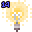

texture_name : Light Block 14
type : Item, Utility
usage_context : Used in-game to provide adjustable lighting without an actual in-game light source visible.
functionality : The block provides light at a specific light level which is indicated by the number in the corner of the texture.
related_items_blocks : Light Block 0-15 (where the number represents the light level).
special_effects_in_game_functionality : The light level emitted is controlled by the number in the corner, allowing for precise lighting adjustments in-game without a physical light source being present.
overall_texture_description : A 16x16 pixel art item texture representing a Light Block 14, shown as a bright yellow bulb on a gray fixture, intricate pixelated design emitting rays of light symbolizing brightness, with a number "14" in upper left indicating the light level, primarily used for customizable lighting in-game settings.


In [11]:
for index in indices:
    print("-" * 20)
    row = ds[index]
    img = row['image']
    img.show()
    for key in keys:
        print(key, ":", row[key])

Значит тут всё же могут быть не только текстуры установленных блоков, но и их рисунки, как они отображаются в инвентаре

### Вывод

Датасет сгодится для дообучения VL модели для уточнения знаний об игре